In [1]:
# Install watermark
!pip install watermark --quiet

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib_venn import venn2  # pip install matplotlib-venn
import random
import os
from watermark import watermark
import pkg_resources


SEED = 42

def set_seed(SEED):
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)

set_seed(SEED)

# Pandas (if you're doing any random operations)
pd.options.mode.chained_assignment = None  # Optional: to avoid SettingWithCopyWarning

# Scikit-learn (for train_test_split and any sklearn algorithms)
from sklearn import config_context



import warnings
warnings.filterwarnings('ignore')

C:\Users\Computer User\AppData\Local\Temp\ipykernel_11572\624266084.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [3]:
set_seed(SEED)

In [4]:
# Print versions of all imported modules, system info, and author using watermark
print(watermark(iversions=True, globals_=globals(), machine=True, author="Mawero Rodney G."))

# Generate requirements.txt
def generate_requirements():
    # List of imported packages
    packages = ['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'matplotlib-venn']
    
    # Get installed versions
    requirements = []
    for pkg in packages:
        try:
            version = pkg_resources.get_distribution(pkg).version
            requirements.append(f"{pkg}=={version}")
        except pkg_resources.DistributionNotFound:
            print(f"Package {pkg} not found in the environment.")
    
    # Write to requirements.txt
    with open('requirements.txt', 'w') as f:
        for req in requirements:
            f.write(req + '\n')
    print("requirements.txt file generated successfully.")

# Call the function to generate requirements.txt
generate_requirements()

Author: Mawero Rodney G.

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

matplotlib     : 3.10.0
sklearn        : 1.6.1
matplotlib_venn: 1.1.2
seaborn        : 0.13.2
watermark      : 2.5.0
pandas         : 2.2.3
numpy          : 1.26.4

requirements.txt file generated successfully.


In [5]:
# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
holidays_df = pd.read_csv("holidays.csv")
dates_df = pd.read_csv("dates.csv")
stores_df = pd.read_csv("stores.csv")
Sammple_submission = pd.read_csv("SampleSubmission.csv") 

In [6]:
train_df.head()

date store_id  category_id  target  onpromotion  nbr_of_transactions
0   365  store_1  category_24     0.0            0                  0.0
1   365  store_1  category_21     0.0            0                  0.0
2   365  store_1  category_32     0.0            0                  0.0
3   365  store_1  category_18     0.0            0                  0.0
4   365  store_1  category_26     0.0            0                  0.0

In [7]:
test_df.head()

date store_id  category_id  onpromotion
0  1627  store_1  category_24            0
1  1627  store_1  category_21            0
2  1627  store_1  category_32            0
3  1627  store_1  category_18           16
4  1627  store_1  category_26            0

In [8]:
holidays_df.head()

date  type
0     1     0
1     5     4
2    12     4
3    42     0
4    43     0

In [9]:
dates_df.head()

date  year  month  dayofmonth  dayofweek  dayofyear  weekofyear  quarter  \
0   365     1      1           1          2          1           1        1   
1   366     1      1           2          3          2           1        1   
2   367     1      1           3          4          3           1        1   
3   368     1      1           4          5          4           1        1   
4   369     1      1           5          6          5           1        1   

   is_month_start  is_month_end  is_quarter_start  is_quarter_end  \
0            True         False              True           False   
1           False         False             False           False   
2           False         False             False           False   
3           False         False             False           False   
4           False         False             False           False   

   is_year_start  is_year_end  year_weekofyear  
0           True        False              101  
1          False        False              101  
2          False        False              101  
3          False        False              101  
4          False        False              101

In [10]:
stores_df.head()

store_id  city  type  cluster
0  store_1     0     0        0
1  store_2     0     0        0
2  store_3     0     0        1
3  store_4     0     0        2
4  store_5     1     0        3

In [11]:
Sammple_submission.head()

ID  target
0  year_week_425_store_1_category_0       0
1  year_week_426_store_1_category_0       0
2  year_week_427_store_1_category_0       1
3  year_week_428_store_1_category_0       3
4  year_week_429_store_1_category_0       2

In [12]:
# merging datasets
train_merged = train_df.merge(dates_df, on="date", how="left")
test_merged = test_df.merge(dates_df, on="date", how="left")

In [13]:
train_merged.isna().sum().sum(), test_merged.isna().sum().sum()

(0, 0)

- holidays has a date column. However, holidays are more rare, and is just another day, only "special". So all the special days will be featured in their own column.

In [14]:
train_merged['is_holiday'] = train_merged['date'].isin(holidays_df['date']).astype(int)
test_merged['is_holiday'] = test_merged['date'].isin(holidays_df['date']).astype(int)

In [15]:
train_merged.is_holiday.value_counts()

is_holiday
0    1899612
1     349272
Name: count, dtype: int64

In [16]:
test_merged.is_holiday.value_counts()

is_holiday
0    83754
1    16038
Name: count, dtype: int64

In [17]:
train_merged.head()

date store_id  category_id  target  onpromotion  nbr_of_transactions  year  \
0   365  store_1  category_24     0.0            0                  0.0     1   
1   365  store_1  category_21     0.0            0                  0.0     1   
2   365  store_1  category_32     0.0            0                  0.0     1   
3   365  store_1  category_18     0.0            0                  0.0     1   
4   365  store_1  category_26     0.0            0                  0.0     1   

   month  dayofmonth  dayofweek  ...  weekofyear  quarter  is_month_start  \
0      1           1          2  ...           1        1            True   
1      1           1          2  ...           1        1            True   
2      1           1          2  ...           1        1            True   
3      1           1          2  ...           1        1            True   
4      1           1          2  ...           1        1            True   

   is_month_end  is_quarter_start  is_quarter_end  is_year_start  is_year_end  \
0         False              True           False           True        False   
1         False              True           False           True        False   
2         False              True           False           True        False   
3         False              True           False           True        False   
4         False              True           False           True        False   

   year_weekofyear  is_holiday  
0              101           1  
1              101           1  
2              101           1  
3              101           1  
4              101           1  

[5 rows x 21 columns]

In [18]:
# Rename 'type' in holidays_df
holidays_df = holidays_df.rename(columns={'type': 'holiday_type'})
stores_df = stores_df.rename(columns={'type': 'stores_type'})

In [19]:
train_merged = train_merged.merge(holidays_df, on='date', how='left')
test_merged = test_merged.merge(holidays_df, on='date', how='left')

In [20]:
train_merged = train_merged.merge(stores_df, on="store_id", how="left")
test_merged = test_merged.merge(stores_df, on='store_id', how='left')

In [21]:
train_merged.head()

date store_id  category_id  target  onpromotion  nbr_of_transactions  year  \
0   365  store_1  category_24     0.0            0                  0.0     1   
1   365  store_1  category_21     0.0            0                  0.0     1   
2   365  store_1  category_32     0.0            0                  0.0     1   
3   365  store_1  category_18     0.0            0                  0.0     1   
4   365  store_1  category_26     0.0            0                  0.0     1   

   month  dayofmonth  dayofweek  ...  is_quarter_start  is_quarter_end  \
0      1           1          2  ...              True           False   
1      1           1          2  ...              True           False   
2      1           1          2  ...              True           False   
3      1           1          2  ...              True           False   
4      1           1          2  ...              True           False   

   is_year_start  is_year_end  year_weekofyear  is_holiday  holiday_type  \
0           True        False              101           1           0.0   
1           True        False              101           1           0.0   
2           True        False              101           1           0.0   
3           True        False              101           1           0.0   
4           True        False              101           1           0.0   

   city  stores_type  cluster  
0     0            0        0  
1     0            0        0  
2     0            0        0  
3     0            0        0  
4     0            0        0  

[5 rows x 25 columns]

In [22]:
test_merged.head()

date store_id  category_id  onpromotion  year  month  dayofmonth  \
0  1627  store_1  category_24            0     4      6          19   
1  1627  store_1  category_21            0     4      6          19   
2  1627  store_1  category_32            0     4      6          19   
3  1627  store_1  category_18           16     4      6          19   
4  1627  store_1  category_26            0     4      6          19   

   dayofweek  dayofyear  weekofyear  ...  is_quarter_start  is_quarter_end  \
0          0        170          25  ...             False           False   
1          0        170          25  ...             False           False   
2          0        170          25  ...             False           False   
3          0        170          25  ...             False           False   
4          0        170          25  ...             False           False   

   is_year_start  is_year_end  year_weekofyear  is_holiday  holiday_type  \
0          False        False              425           0           NaN   
1          False        False              425           0           NaN   
2          False        False              425           0           NaN   
3          False        False              425           0           NaN   
4          False        False              425           0           NaN   

   city  stores_type  cluster  
0     0            0        0  
1     0            0        0  
2     0            0        0  
3     0            0        0  
4     0            0        0  

[5 rows x 23 columns]

In [23]:
train_df.shape, train_merged.shape

((2248884, 6), (2288088, 25))

In [24]:
test_df.shape, test_merged.shape

((99792, 4), (105138, 23))

In [25]:
train_merged.isna().sum()

date                         0
store_id                     0
category_id                  0
target                       0
onpromotion                  0
nbr_of_transactions          0
year                         0
month                        0
dayofmonth                   0
dayofweek                    0
dayofyear                    0
weekofyear                   0
quarter                      0
is_month_start               0
is_month_end                 0
is_quarter_start             0
is_quarter_end               0
is_year_start                0
is_year_end                  0
year_weekofyear              0
is_holiday                   0
holiday_type           1899612
city                         0
stores_type                  0
cluster                      0
dtype: int64

In [26]:
test_merged.isna().sum()

date                    0
store_id                0
category_id             0
onpromotion             0
year                    0
month                   0
dayofmonth              0
dayofweek               0
dayofyear               0
weekofyear              0
quarter                 0
is_month_start          0
is_month_end            0
is_quarter_start        0
is_quarter_end          0
is_year_start           0
is_year_end             0
year_weekofyear         0
is_holiday              0
holiday_type        83754
city                    0
stores_type             0
cluster                 0
dtype: int64

In [27]:
train_merged.holiday_type.value_counts()

holiday_type
0.0    219186
5.0     98010
2.0     48114
1.0     12474
4.0      5346
3.0      5346
Name: count, dtype: int64

- There are 6 holiday types. As the NANS are non holidays, they will be replaced by a very small value.

In [28]:
train_merged.holiday_type = train_merged.holiday_type.fillna(-0.1)
test_merged.holiday_type = test_merged.holiday_type.fillna(-0.1)

In [29]:
train_merged.holiday_type.value_counts()

holiday_type
-0.1    1899612
 0.0     219186
 5.0      98010
 2.0      48114
 1.0      12474
 4.0       5346
 3.0       5346
Name: count, dtype: int64

In [30]:
train_merged.isna().sum().sum(), test_merged.isna().sum().sum()

(0, 0)

## Exploratory Data Analysis

In [31]:
store_wk_sales= train_merged.groupby(['store_id', 'weekofyear']).sum().sort_values('target', ascending = False)
store_wk_sales = store_wk_sales[['target']].round(3)
store_wk_sales.reset_index(inplace = True)
store_wk_sales

store_id  weekofyear       target
0     store_44           1  1246030.879
1     store_44          51  1174871.547
2     store_44          18  1172823.610
3     store_45           1  1170681.146
4     store_44           2  1165663.489
...        ...         ...          ...
2857  store_52          28        0.000
2858  store_52          29        0.000
2859  store_52          30        0.000
2860  store_52          31        0.000
2861  store_52          25        0.000

[2862 rows x 3 columns]

In [32]:
store_wk_sales.shape

(2862, 3)

In [33]:
unique_stores = store_wk_sales['store_id'].nunique()
print(f"Number of unique stores: {unique_stores}")

Number of unique stores: 54


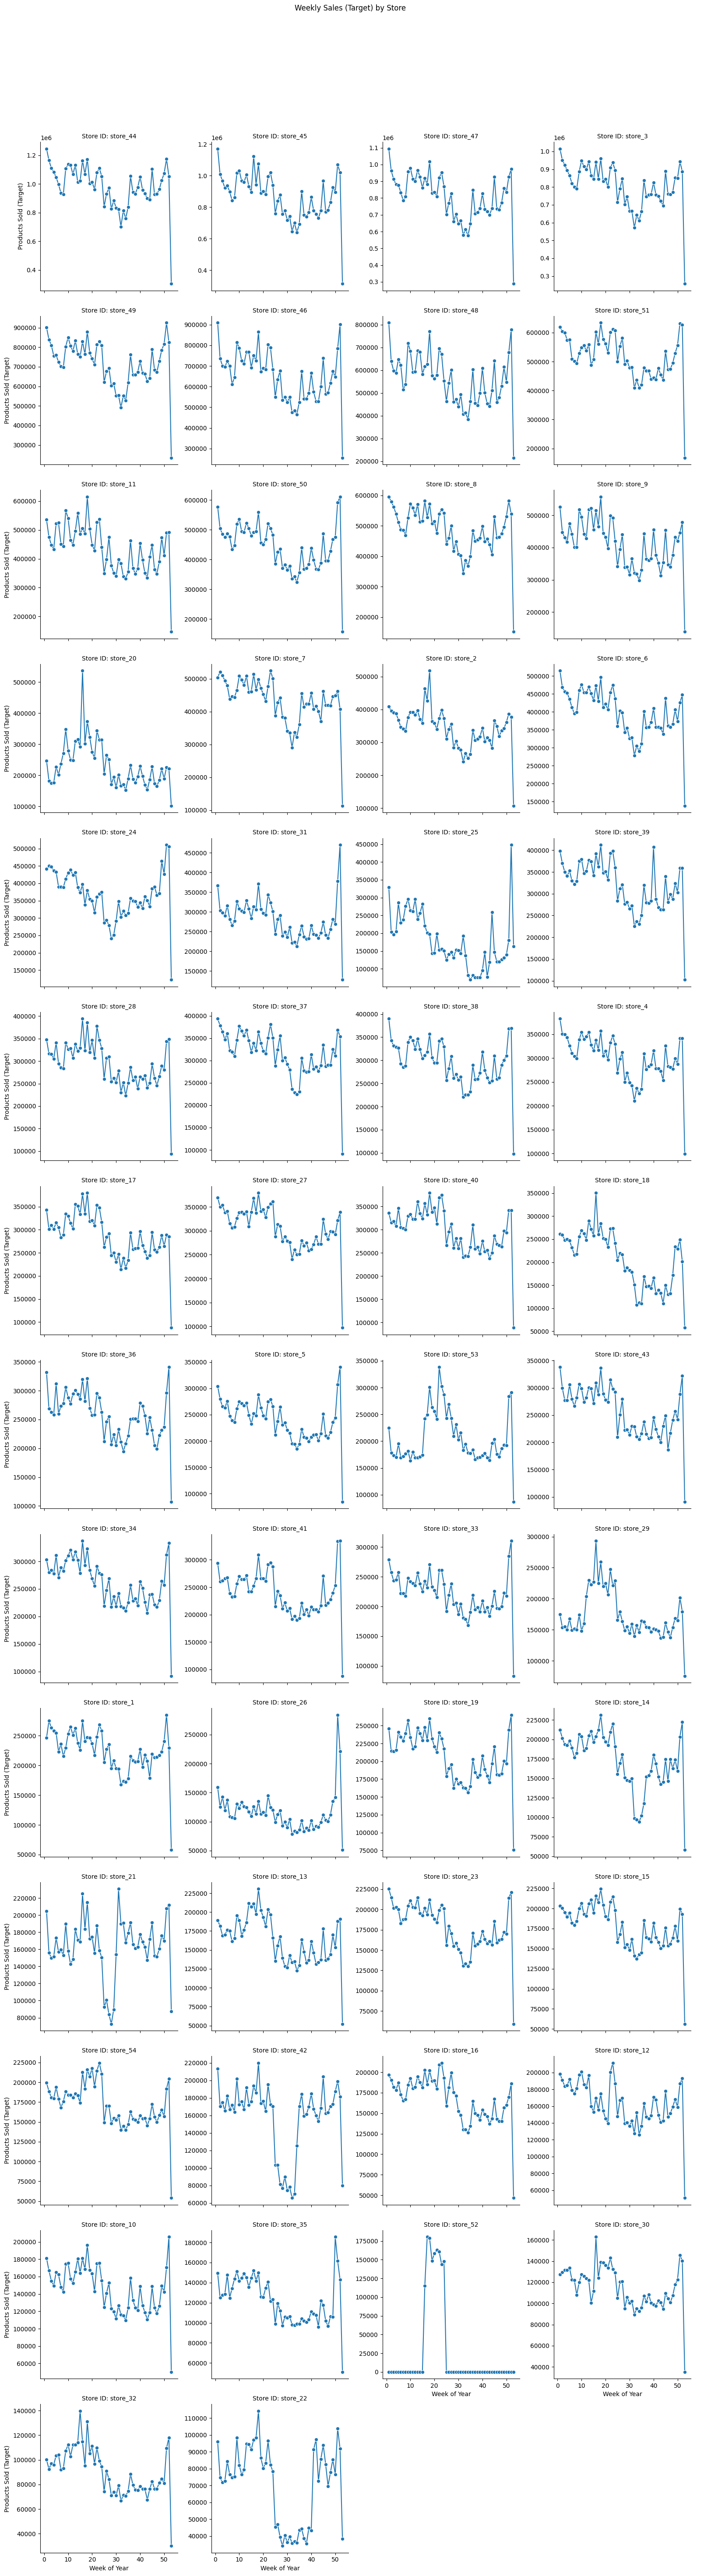

In [34]:
# Line Plot for All Stores (if few stores)
if unique_stores <= 10:  # Limit to avoid cluttered plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=store_wk_sales, x='weekofyear', y='target', hue='store_id', marker='o')
    plt.title('Weekly Sales (Target) by Store Over Week of Year')
    plt.xlabel('Week of Year')
    plt.ylabel('Products Sold (Target)')
    plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Facet Plot for Many Stores
else:
    g = sns.FacetGrid(store_wk_sales, col='store_id', col_wrap=4, height=4, sharey=False)
    g.map(sns.lineplot, 'weekofyear', 'target', marker='o')
    g.set_titles('Store ID: {col_name}')
    g.set_axis_labels('Week of Year', 'Products Sold (Target)')
    g.fig.suptitle('Weekly Sales (Target) by Store', y=1.05)
    g.add_legend()
    plt.show()

- Is store 52 still open? Or is it open for only certain weeks of the year?

In [35]:
store_yr_sales= train_merged.groupby(['store_id', "weekofyear", 'year_weekofyear']).sum().sort_values('target', ascending = False)
store_yr_sales = store_yr_sales[['target']].round(3)
store_yr_sales.reset_index(inplace = True)
store_yr_sales

store_id  weekofyear  year_weekofyear      target
0     store_45          16              316  498705.276
1     store_44          16              316  486976.714
2     store_44           1              401  434857.014
3     store_44          45              345  428029.975
4     store_45          51              351  417893.025
...        ...         ...              ...         ...
9769  store_21          16              216       0.000
9770  store_52           6              306       0.000
9771  store_42          37              137       0.000
9772  store_42          38              138       0.000
9773  store_52          51              351       0.000

[9774 rows x 4 columns]

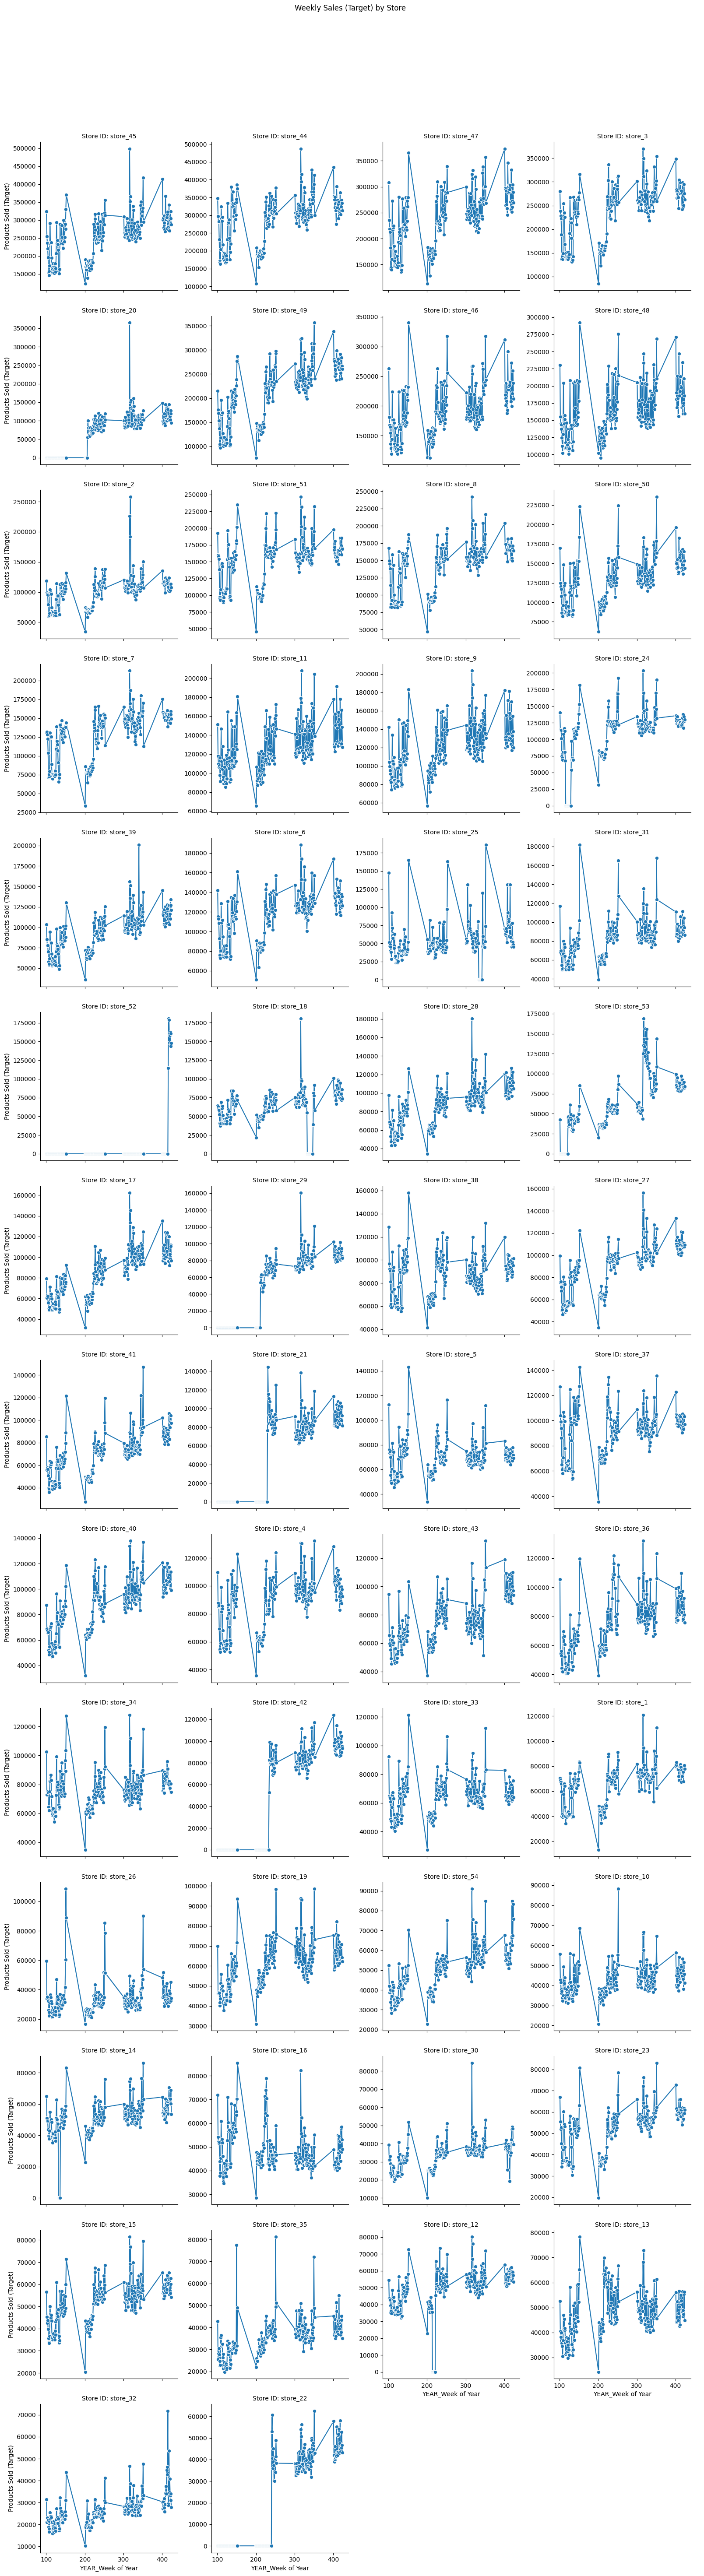

In [36]:
# Line Plot for All Stores (if few stores)
if unique_stores <= 10:  # Limit to avoid cluttered plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=store_yr_sales, x='year_weekofyear', y='target', hue='store_id', marker='o')
    plt.title('Weekly Sales (Target) by Store Over year_weekofyear')
    plt.xlabel('YEAR_Week of Year')
    plt.ylabel('Products Sold (Target)')
    plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Facet Plot for Many Stores
else:
    g = sns.FacetGrid(store_yr_sales, col='store_id', col_wrap=4, height=4, sharey=False)
    g.map(sns.lineplot, 'year_weekofyear', 'target', marker='o')
    g.set_titles('Store ID: {col_name}')
    g.set_axis_labels('YEAR_Week of Year', 'Products Sold (Target)')
    g.fig.suptitle('Weekly Sales (Target) by Store', y=1.05)
    g.add_legend()
    plt.show()

- Store 52 opened only in year 4, around week 13-15 . second quarter. hence the zero sales seen in the weekly breakdown(per month regardless of year).
- Store 22 opened in the middle of te second year 
- There is a noticeable peak in sales at the end of the year in most stalls, coinciding with Christmas/New Year festivities. 
- The peak in Dec is followed by a trough at the beginning of the year, with sales picking up thereafter
- Most of the stores recorded sales throughout the entire period, few have partial data e.g store 52, 21, 22

## Feature Engineering

In [37]:
train_merged.columns

Index(['date', 'store_id', 'category_id', 'target', 'onpromotion',
       'nbr_of_transactions', 'year', 'month', 'dayofmonth', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'year_weekofyear', 'is_holiday', 'holiday_type', 'city', 'stores_type',
       'cluster'],
      dtype='object')

In [38]:
# Aggregate target and onpromotion by store_id, year, weekofyear
weekly_sales_train = train_merged.groupby(['store_id', "category_id", 'year', 'weekofyear', "year_weekofyear"])\
    .agg({'target': 'sum', 'onpromotion': 'sum'}).reset_index()

# Merge static features (city, cluster) from stores_df
weekly_sales_train = weekly_sales_train.merge(
    stores_df[['store_id', 'city', 'cluster']],
    on='store_id',
    how='left'
)

In [39]:
weekly_sales_train

store_id category_id  year  weekofyear  year_weekofyear   target  \
0       store_1  category_0     1           1              101    137.0   
1       store_1  category_0     1           2              102    115.0   
2       store_1  category_0     1           3              103    115.0   
3       store_1  category_0     1           4              104     88.0   
4       store_1  category_0     1           5              105    153.0   
...         ...         ...   ...         ...              ...      ...   
326101  store_9  category_9     4          21              421  11185.0   
326102  store_9  category_9     4          22              422  14760.0   
326103  store_9  category_9     4          23              423  12192.0   
326104  store_9  category_9     4          24              424  10027.0   
326105  store_9  category_9     4          52              352      0.0   

        onpromotion  city  cluster  
0                 0     0        0  
1                 0     0        0  
2                 0     0        0  
3                 0     0        0  
4                 0     0        0  
...             ...   ...      ...  
326101          253     0        4  
326102          172     0        4  
326103          168     0        4  
326104          197     0        4  
326105            0     0        4  

[326106 rows x 9 columns]

In [40]:
# Add month (take the mode or first month per week)
weekly_month = train_merged.groupby(['year', "weekofyear"])['month'].agg(lambda x: x.mode()[0] if not x.empty else x.iloc[0]).reset_index()
weekly_sales_train = weekly_sales_train.merge(weekly_month, on=['year', 'weekofyear'], how='left')

In [41]:
weekly_month

year  weekofyear  month
0       1           1      1
1       1           2      1
2       1           3      1
3       1           4      1
4       1           5      1
..    ...         ...    ...
178     4          21      5
179     4          22      6
180     4          23      6
181     4          24      6
182     4          52      1

[183 rows x 3 columns]

- ISO calender has 53 weeks in the leap year only, the last week of the year can be messy given lack of an actual datetime column and the extra days after week 52. https://en.wikipedia.org/wiki/ISO_week_date

- in the codeblock below, weekly_holidays variable is created by grouping all non negative holiday types, as the NANs in holiday type were filled with -0.1 and counting all the unique values to create holiday_count column
- then merging weekly holidys with weekly_sales_train
- Lastly redifining is_holiday = holiday_count > 0

In [42]:
weekly_holidays = train_merged[train_merged['holiday_type'] >= 0].groupby(['year', 'weekofyear'])['holiday_type'].nunique().reset_index(name='holiday_count')
weekly_sales_train = weekly_sales_train.merge(weekly_holidays, on=['year', 'weekofyear'], how='left')
weekly_sales_train['holiday_count'] = weekly_sales_train['holiday_count'].fillna(0)
weekly_sales_train['is_holiday'] = (weekly_sales_train['holiday_count'] > 0).astype(int)

In [43]:
weekly_holidays

year  weekofyear  holiday_count
0      1           1              2
1      1           9              1
2      1          10              1
3      1          14              1
4      1          15              1
..   ...         ...            ...
89     4          16              1
90     4          18              1
91     4          19              3
92     4          21              2
93     4          52              1

[94 rows x 3 columns]

In [44]:
train_merged.is_holiday.value_counts()

is_holiday
0    1899612
1     388476
Name: count, dtype: int64

In [45]:
weekly_holidays.holiday_count.value_counts()

holiday_count
1    66
2    23
3     5
Name: count, dtype: int64

In [46]:
weekly_sales_train.is_holiday.value_counts()

is_holiday
1    167508
0    158598
Name: count, dtype: int64

In [47]:
weekly_sales_train.isna().sum().sum()

0

In [48]:
# Add holiday_type (mode per week)
weekly_holiday_type = train_merged.groupby(['year','weekofyear'])['holiday_type'].agg(lambda x: x.mode()[0] if not x.empty else 'Non-Holiday').reset_index()
weekly_sales_train = weekly_sales_train.merge(weekly_holiday_type, on=['year', 'weekofyear'], how='left')
weekly_sales_train['holiday_type'] = weekly_sales_train['holiday_type'].fillna('Non-Holiday')

In [49]:
weekly_holiday_type

year  weekofyear  holiday_type
0       1           1          -0.1
1       1           2          -0.1
2       1           3          -0.1
3       1           4          -0.1
4       1           5          -0.1
..    ...         ...           ...
178     4          21          -0.1
179     4          22          -0.1
180     4          23          -0.1
181     4          24          -0.1
182     4          52           0.0

[183 rows x 3 columns]

In [50]:
weekly_sales_train

store_id category_id  year  weekofyear  year_weekofyear   target  \
0       store_1  category_0     1           1              101    137.0   
1       store_1  category_0     1           2              102    115.0   
2       store_1  category_0     1           3              103    115.0   
3       store_1  category_0     1           4              104     88.0   
4       store_1  category_0     1           5              105    153.0   
...         ...         ...   ...         ...              ...      ...   
326101  store_9  category_9     4          21              421  11185.0   
326102  store_9  category_9     4          22              422  14760.0   
326103  store_9  category_9     4          23              423  12192.0   
326104  store_9  category_9     4          24              424  10027.0   
326105  store_9  category_9     4          52              352      0.0   

        onpromotion  city  cluster  month  holiday_count  is_holiday  \
0                 0     0        0      1            2.0           1   
1                 0     0        0      1            0.0           0   
2                 0     0        0      1            0.0           0   
3                 0     0        0      1            0.0           0   
4                 0     0        0      1            0.0           0   
...             ...   ...      ...    ...            ...         ...   
326101          253     0        4      5            2.0           1   
326102          172     0        4      6            0.0           0   
326103          168     0        4      6            0.0           0   
326104          197     0        4      6            0.0           0   
326105            0     0        4      1            1.0           1   

        holiday_type  
0               -0.1  
1               -0.1  
2               -0.1  
3               -0.1  
4               -0.1  
...              ...  
326101          -0.1  
326102          -0.1  
326103          -0.1  
326104          -0.1  
326105           0.0  

[326106 rows x 13 columns]

In [51]:
# Aggregate test data similarly
weekly_sales_test = test_merged.groupby(['store_id', "category_id", 'year', 'weekofyear', "year_weekofyear"])\
    .agg({'onpromotion': 'sum'}).reset_index()
weekly_sales_test = weekly_sales_test.merge(stores_df[['store_id', 'city', 'cluster']], on='store_id', how='left')

In [52]:
# Add month (take the mode or first month per week)
weekly_month = test_merged.groupby(['year', "weekofyear",])['month'].agg(lambda x: x.mode()[0] if not x.empty else x.iloc[0]).reset_index()
weekly_sales_test = weekly_sales_test.merge(weekly_month, on=['year', 'weekofyear'], how='left')

In [53]:
weekly_month

year  weekofyear  month
0     4          25      6
1     4          26      6
2     4          27      7
3     4          28      7
4     4          29      7
5     4          30      7
6     4          31      8
7     4          32      8

- creating weekly holidays ,this time for test data to create holiday_counts, and redefining is_holiday based on holiday_counts > 0

In [54]:
weekly_holidays = test_merged[test_merged['holiday_type'] >= 0].groupby(['year', 'weekofyear'])['holiday_type'].nunique().reset_index(name='holiday_count')
weekly_sales_test = weekly_sales_test.merge(weekly_holidays, on=['year', 'weekofyear'], how='left')
weekly_sales_test['holiday_count'] = weekly_sales_test['holiday_count'].fillna(0)
weekly_sales_test['is_holiday'] = (weekly_sales_test['holiday_count'] > 0).astype(int)

In [55]:
weekly_holidays

year  weekofyear  holiday_count
0     4          25              1
1     4          27              1
2     4          29              1
3     4          30              1
4     4          31              1
5     4          32              2

In [56]:
test_merged.is_holiday.value_counts()

is_holiday
0    83754
1    21384
Name: count, dtype: int64

In [57]:
weekly_sales_test.is_holiday.value_counts()

is_holiday
1    10692
0     3564
Name: count, dtype: int64

In [58]:
weekly_sales_test.holiday_count.value_counts()

holiday_count
1.0    8910
0.0    3564
2.0    1782
Name: count, dtype: int64

- There is a higher proportion of holidays  in test data compared to train

In [59]:
# Add holiday_type (mode per week)
weekly_holiday_type = test_merged.groupby(['year','weekofyear'])['holiday_type'].agg(lambda x: x.mode()[0] if not x.empty else 'Non-Holiday').reset_index()
weekly_sales_test = weekly_sales_test.merge(weekly_holiday_type, on=['year', 'weekofyear'], how='left')
weekly_sales_test['holiday_type'] = weekly_sales_test['holiday_type'].fillna('Non-Holiday')

In [60]:
weekly_sales_test

store_id category_id  year  weekofyear  year_weekofyear  onpromotion  \
0      store_1  category_0     4          25              425           27   
1      store_1  category_0     4          26              426           22   
2      store_1  category_0     4          27              427           45   
3      store_1  category_0     4          28              428           24   
4      store_1  category_0     4          29              429           29   
...        ...         ...   ...         ...              ...          ...   
14251  store_9  category_9     4          28              428          209   
14252  store_9  category_9     4          29              429          118   
14253  store_9  category_9     4          30              430          128   
14254  store_9  category_9     4          31              431          155   
14255  store_9  category_9     4          32              432          156   

       city  cluster  month  holiday_count  is_holiday  holiday_type  
0         0        0      6            1.0           1          -0.1  
1         0        0      6            0.0           0          -0.1  
2         0        0      7            1.0           1          -0.1  
3         0        0      7            0.0           0          -0.1  
4         0        0      7            1.0           1          -0.1  
...     ...      ...    ...            ...         ...           ...  
14251     0        4      7            0.0           0          -0.1  
14252     0        4      7            1.0           1          -0.1  
14253     0        4      7            1.0           1          -0.1  
14254     0        4      8            1.0           1          -0.1  
14255     0        4      8            2.0           1          -0.1  

[14256 rows x 12 columns]

In [61]:
weekly_sales_train.isna().sum()

store_id           0
category_id        0
year               0
weekofyear         0
year_weekofyear    0
target             0
onpromotion        0
city               0
cluster            0
month              0
holiday_count      0
is_holiday         0
holiday_type       0
dtype: int64

In [62]:
weekly_sales_test.isna().sum()

store_id           0
category_id        0
year               0
weekofyear         0
year_weekofyear    0
onpromotion        0
city               0
cluster            0
month              0
holiday_count      0
is_holiday         0
holiday_type       0
dtype: int64

Number of unique stores: 54


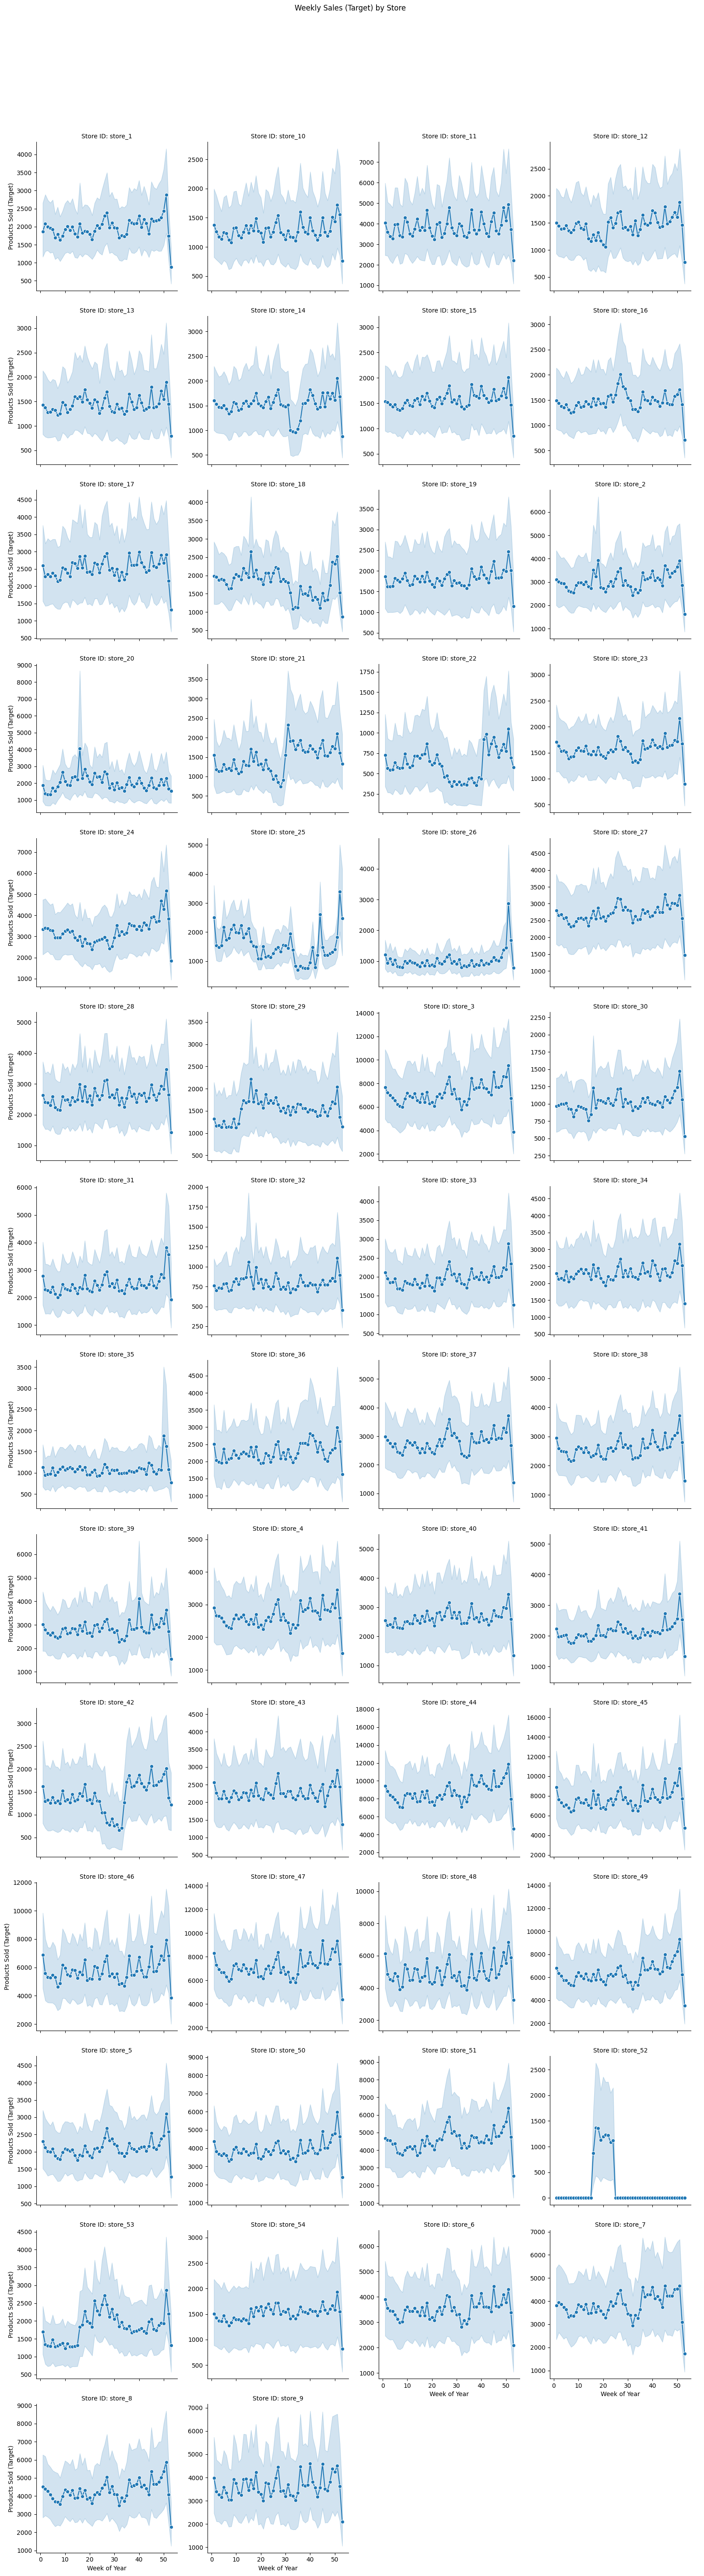

In [63]:
# Plot training data (store_id, weekofyear, target)
unique_stores = weekly_sales_train['store_id'].nunique()
print(f"Number of unique stores: {unique_stores}")
if unique_stores <= 10:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=weekly_sales_train, x='weekofyear', y='target', hue='store_id', marker='o')
    plt.title('Weekly Sales (Target) by Store Over Week of Year')
    plt.xlabel('Week of Year')
    plt.ylabel('Products Sold (Target)')
    plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    g = sns.FacetGrid(weekly_sales_train, col='store_id', col_wrap=4, height=4, sharey=False)
    g.map(sns.lineplot, 'weekofyear', 'target', marker='o')
    g.set_titles('Store ID: {col_name}')
    g.set_axis_labels('Week of Year', 'Products Sold (Target)')
    g.fig.suptitle('Weekly Sales (Target) by Store', y=1.05)
    g.add_legend()
    plt.show()


In [64]:
weekly_sales_train

store_id category_id  year  weekofyear  year_weekofyear   target  \
0       store_1  category_0     1           1              101    137.0   
1       store_1  category_0     1           2              102    115.0   
2       store_1  category_0     1           3              103    115.0   
3       store_1  category_0     1           4              104     88.0   
4       store_1  category_0     1           5              105    153.0   
...         ...         ...   ...         ...              ...      ...   
326101  store_9  category_9     4          21              421  11185.0   
326102  store_9  category_9     4          22              422  14760.0   
326103  store_9  category_9     4          23              423  12192.0   
326104  store_9  category_9     4          24              424  10027.0   
326105  store_9  category_9     4          52              352      0.0   

        onpromotion  city  cluster  month  holiday_count  is_holiday  \
0                 0     0        0      1            2.0           1   
1                 0     0        0      1            0.0           0   
2                 0     0        0      1            0.0           0   
3                 0     0        0      1            0.0           0   
4                 0     0        0      1            0.0           0   
...             ...   ...      ...    ...            ...         ...   
326101          253     0        4      5            2.0           1   
326102          172     0        4      6            0.0           0   
326103          168     0        4      6            0.0           0   
326104          197     0        4      6            0.0           0   
326105            0     0        4      1            1.0           1   

        holiday_type  
0               -0.1  
1               -0.1  
2               -0.1  
3               -0.1  
4               -0.1  
...              ...  
326101          -0.1  
326102          -0.1  
326103          -0.1  
326104          -0.1  
326105           0.0  

[326106 rows x 13 columns]

In [65]:
last_week = weekly_sales_train['year_weekofyear'].max() #Last week of train data

last_week

424

In [66]:
cutoff_week = last_week - 8  # Last 8 weeks for validation
cutoff_week

416

In [67]:
last_year = weekly_sales_train['year'].max()

last_year

4

In [68]:
weekly_sales_train

store_id category_id  year  weekofyear  year_weekofyear   target  \
0       store_1  category_0     1           1              101    137.0   
1       store_1  category_0     1           2              102    115.0   
2       store_1  category_0     1           3              103    115.0   
3       store_1  category_0     1           4              104     88.0   
4       store_1  category_0     1           5              105    153.0   
...         ...         ...   ...         ...              ...      ...   
326101  store_9  category_9     4          21              421  11185.0   
326102  store_9  category_9     4          22              422  14760.0   
326103  store_9  category_9     4          23              423  12192.0   
326104  store_9  category_9     4          24              424  10027.0   
326105  store_9  category_9     4          52              352      0.0   

        onpromotion  city  cluster  month  holiday_count  is_holiday  \
0                 0     0        0      1            2.0           1   
1                 0     0        0      1            0.0           0   
2                 0     0        0      1            0.0           0   
3                 0     0        0      1            0.0           0   
4                 0     0        0      1            0.0           0   
...             ...   ...      ...    ...            ...         ...   
326101          253     0        4      5            2.0           1   
326102          172     0        4      6            0.0           0   
326103          168     0        4      6            0.0           0   
326104          197     0        4      6            0.0           0   
326105            0     0        4      1            1.0           1   

        holiday_type  
0               -0.1  
1               -0.1  
2               -0.1  
3               -0.1  
4               -0.1  
...              ...  
326101          -0.1  
326102          -0.1  
326103          -0.1  
326104          -0.1  
326105           0.0  

[326106 rows x 13 columns]

In [69]:
weekly_sales_train.store_id.nunique()

54

In [70]:
weekly_sales_test.store_id.nunique()

54

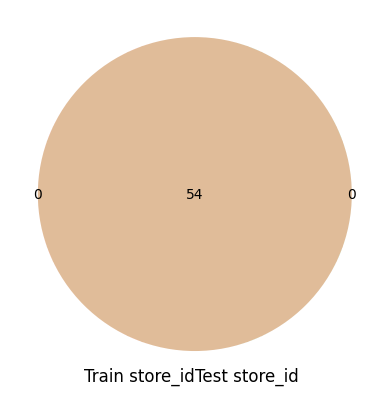

In [71]:
train_store_id_set = set(weekly_sales_train['store_id'].values.tolist())
test_store_id_set = set(weekly_sales_test['store_id'].values.tolist())

venn2([train_store_id_set, test_store_id_set], ('Train store_id', 'Test store_id'))
plt.show()

- All the train and test data store ids match

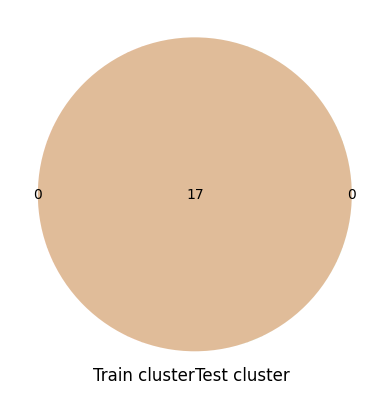

In [72]:
train_cluster_set = set(weekly_sales_train['cluster'].values.tolist())
test_cluster_set = set(weekly_sales_test['cluster'].values.tolist())

venn2([train_cluster_set, test_cluster_set], ('Train cluster', 'Test cluster'))
plt.show()

- all the clusters, cities, categories in train and test data match

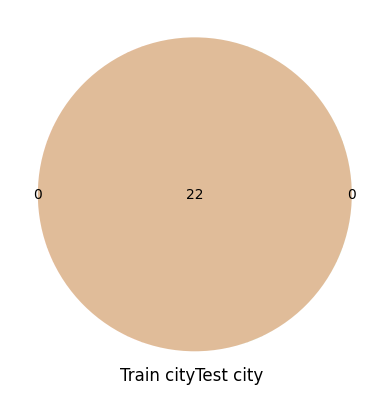

In [73]:
train_city_set = set(weekly_sales_train['city'].values.tolist())
test_city_set = set(weekly_sales_test['city'].values.tolist())

venn2([train_city_set, test_city_set], ('Train city', 'Test city'))
plt.show()

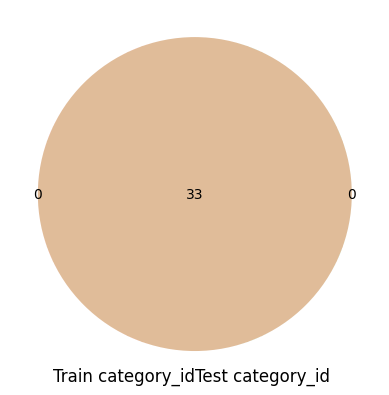

In [74]:
train_category_set = set(weekly_sales_train['category_id'].values.tolist())
test_category_set = set(weekly_sales_test['category_id'].values.tolist())

venn2([train_category_set, test_category_set], ('Train category_id', 'Test category_id'))
plt.show()

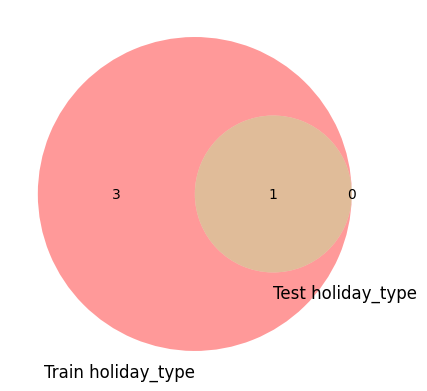

In [75]:
train_holiday_type_set = set(weekly_sales_train['holiday_type'].values.tolist())
test_holiday_type_set = set(weekly_sales_test['holiday_type'].values.tolist())

venn2([train_holiday_type_set, test_holiday_type_set], ('Train holiday_type', 'Test holiday_type'))
plt.show()

- Train data has 3 holiday types, while test data has only 1

In [76]:
cutoff_week # defined earlier

416

## Modelling

In [77]:
# Split into train and validation
train_data = weekly_sales_train[weekly_sales_train['year_weekofyear'] <= cutoff_week]
val_data = weekly_sales_train[weekly_sales_train['year_weekofyear'] > cutoff_week]

# Verify split
print(f"Training weeks: {train_data['year_weekofyear'].min()} to {train_data['year_weekofyear'].max()}")
print(f"Validation weeks: {val_data['year_weekofyear'].min()} to {val_data['year_weekofyear'].max()}")
print(f"Validation size: {len(val_data)} rows, {val_data['store_id'].nunique()} stores")


Training weeks: 101 to 416
Validation weeks: 417 to 424
Validation size: 14256 rows, 54 stores


In [78]:
X_train = train_data[['year', "year_weekofyear", 'weekofyear', 'month', 'onpromotion', 'city', "holiday_count", 'cluster',]]
y_train = train_data['target']
y_train = np.log1p(y_train)

In [79]:
# creating model instance and fitting the model

In [80]:
model = RandomForestRegressor(random_state=SEED, max_depth=12)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=42)

In [81]:
X_val = val_data[['year', "year_weekofyear", 'weekofyear', 'month', 'onpromotion', 'city', "holiday_count",'cluster',]]
y_val = val_data['target']
y_val = np.log1p(y_val)

In [82]:
# Predict on val set
val_pred = model.predict(X_val)
# Evaluate model
mae = mean_absolute_error(y_val, val_pred)
mse = mean_squared_error(y_val, val_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

MAE: 0.9933, RMSE: 1.3144


In [83]:
# X_test

In [84]:
X_test = weekly_sales_test[X_train.columns]

- Since the data was already log transformed, the predictions will be left as is.

In [85]:
weekly_sales_test['target'] = model.predict(X_test)

In [86]:
forecast = weekly_sales_test[['store_id', 'year', "year_weekofyear", 'weekofyear', 'category_id', 'target']]

In [87]:
forecast

store_id  year  year_weekofyear  weekofyear category_id    target
0      store_1     4              425          25  category_0  6.861314
1      store_1     4              426          26  category_0  6.880780
2      store_1     4              427          27  category_0  7.966451
3      store_1     4              428          28  category_0  6.851885
4      store_1     4              429          29  category_0  7.113997
...        ...   ...              ...         ...         ...       ...
14251  store_9     4              428          28  category_9  9.122557
14252  store_9     4              429          29  category_9  7.992574
14253  store_9     4              430          30  category_9  8.012514
14254  store_9     4              431          31  category_9  8.886367
14255  store_9     4              432          32  category_9  8.881289

[14256 rows x 6 columns]

- Using forecast df to create ID column in the format in SampleSubmission

In [88]:
forecast['ID'] = (
    "year_week_" +
    forecast['year_weekofyear'].astype(str).str.zfill(2) + 
    "_" +
    forecast['store_id'].astype(str) +
    "_" +
    forecast['category_id'].astype(str)
)

In [89]:
forecast

store_id  year  year_weekofyear  weekofyear category_id    target  \
0      store_1     4              425          25  category_0  6.861314   
1      store_1     4              426          26  category_0  6.880780   
2      store_1     4              427          27  category_0  7.966451   
3      store_1     4              428          28  category_0  6.851885   
4      store_1     4              429          29  category_0  7.113997   
...        ...   ...              ...         ...         ...       ...   
14251  store_9     4              428          28  category_9  9.122557   
14252  store_9     4              429          29  category_9  7.992574   
14253  store_9     4              430          30  category_9  8.012514   
14254  store_9     4              431          31  category_9  8.886367   
14255  store_9     4              432          32  category_9  8.881289   

                                     ID  
0      year_week_425_store_1_category_0  
1      year_week_426_store_1_category_0  
2      year_week_427_store_1_category_0  
3      year_week_428_store_1_category_0  
4      year_week_429_store_1_category_0  
...                                 ...  
14251  year_week_428_store_9_category_9  
14252  year_week_429_store_9_category_9  
14253  year_week_430_store_9_category_9  
14254  year_week_431_store_9_category_9  
14255  year_week_432_store_9_category_9  

[14256 rows x 7 columns]

In [90]:
# model feature importance
importances = model.feature_importances_
importances

array([0.00119192, 0.0685823 , 0.01011782, 0.00380166, 0.82451996,
       0.03909841, 0.00118577, 0.05150215])

In [91]:
# Plotting feature importances
def plot_feature_importances(importances, feature_names=None, title="Feature Importances", max_features=20):
    """
    Plot feature importances from a trained model.
    
    Parameters:
    - importances: array of feature importances
    - feature_names: list of feature names (optional)
    - title: plot title
    - max_features: maximum number of features to display
    """
    # Convert to numpy array if not already
    importances = np.array(importances)
    
    # Get indices that would sort the array
    indices = np.argsort(importances)[::-1]
    
    # Limit to max_features
    if len(importances) > max_features:
        print(f"Showing top {max_features} of {len(importances)} features")
        indices = indices[:max_features]
    
    # Create feature names if not provided
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(len(importances))]
    else:
        feature_names = np.array(feature_names)
    
    # Plot styling
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Create bar plot
    sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
    
    # Add plot labels and title
    plt.title(title, fontsize=16)
    plt.xlabel('Relative Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.tight_layout()
    
    plt.show()

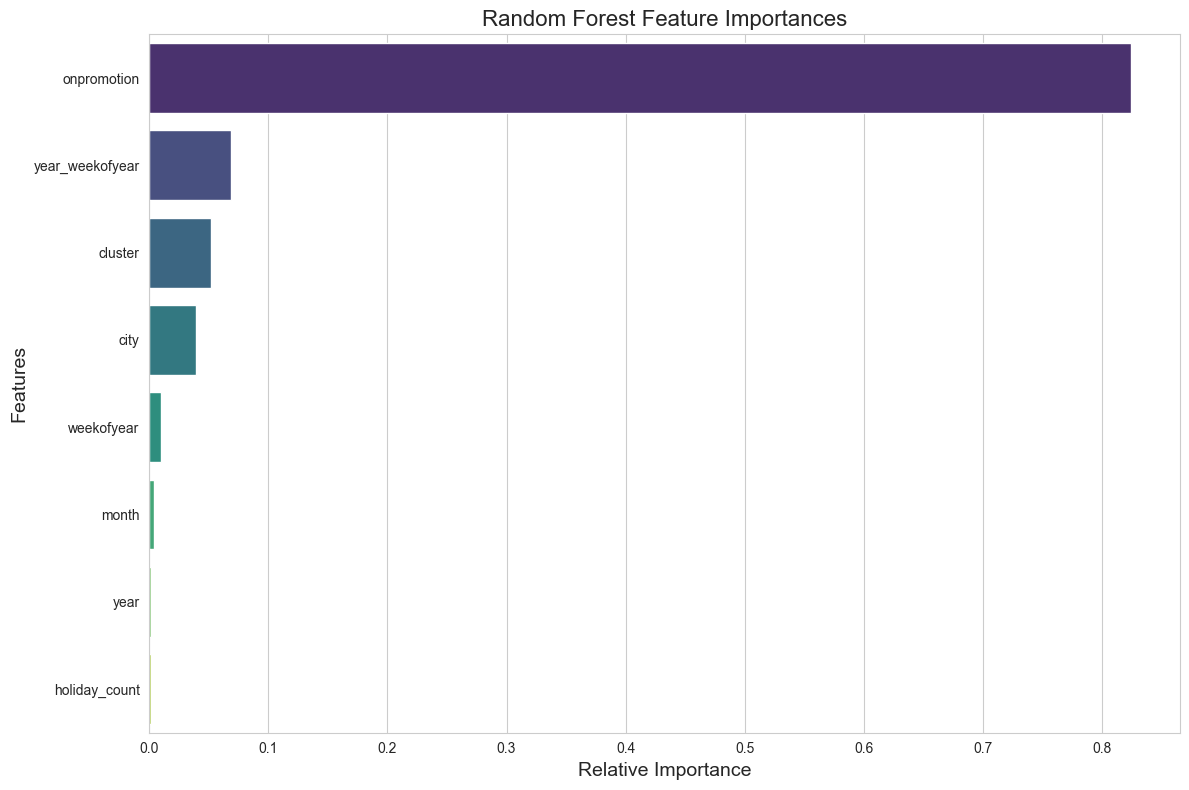

In [92]:
plot_feature_importances(importances, feature_names=X_train.columns, title="Random Forest Feature Importances")

- <b>onpromotion</b> is the most important feature
- year_weekofyear is second and cluster  is third
- city 4th and weekofyear wrap up top 5 features

In [93]:
submission = forecast[['ID', 'target']]
print(submission.head())

# Save submission 
submission.to_csv('285.csv', index=False)

                                 ID    target
0  year_week_425_store_1_category_0  6.861314
1  year_week_426_store_1_category_0  6.880780
2  year_week_427_store_1_category_0  7.966451
3  year_week_428_store_1_category_0  6.851885
4  year_week_429_store_1_category_0  7.113997
